# Telecom Churn Case Study

## Problem statement

First metric is the average revenue per user, also known as ARPU. Average revenue per user tells the story of how much money a company is making for each person using its service. It is synonymous to customer lifetime value. Generally, telecommunications companies that offer bundling services enjoy a higher ARPU

Second metric is customer churn. Customer churn is defined in a similar fashion as you have studied throughout this program. This metric measures the number of subscribers who leave and obviously, a low churn rate is ideal. Companies that experience a high churn rate are under more pressure to generate revenue from other areas or gain new customers

Third metric is subscriber growth rate. A telecommunications company's future revenue growth has much to do with its ability to grow its customer base and add new subscribers. Subscriber growth is, therefore, an extremely important metric. A steady subscriber growth rate indicates a competitive telecommunications company that is keeping up with technology trends, thereby keeping customers happy and attracting new customers

Subscriber acquisition cost is very similar to customer acquisition cost. Although it seems straight-forward, subscriber acquisition cost has many layers. Of course, you’re going to need to factor in money spent on marketing and advertising. But those aren’t the only costs involved with gaining new subscribers. You also need to factor in commission costs to the people selling your product, as well as the costs involved with actually onboarding customers

Coming to TalkTel, although the firm has a stronghold in the sector, its customers are gradually migrating to competition. If this churn doesn’t stop, the firm will be in huge trouble. 
So due to intense competition and the threat of going bust, it decides to hire you as the data analyst and come up with a strategy to counter this


As a data scientist in the marketing department of company X, help them design a program to reach a given customer at the right time with relevant offers so as to enhance its customers retention and improve client loyalty. 
Do you have a quantitative approach in your mind that can predict which of their existing customers are likely to discontinue their service and should be the target audience for this campaign?


#### importing required modules

In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics

#### Reading data set

In [2]:
# setting max no. of colums to dispaly in jupyter notebook
pd.set_option("display.max_columns",50)

In [3]:
#reading data set
df = pd.read_csv("dataset.csv")

## Inspecting the Data frame

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,StreamingService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   StreamingService  7043 non-null   object 
 10  Contract          7043 non-null   object 
 11  PaperlessBilling  7043 non-null   object 
 12  PaymentMethod     7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [7]:
#droping "customerID" from the data set it is a uniq id value
df.drop(['customerID'], axis=1, inplace=True)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Preparation

In [9]:
data_yes_no_columns = ['Partner','Dependents','PhoneService', 'StreamingService', 'PaperlessBilling','Churn']

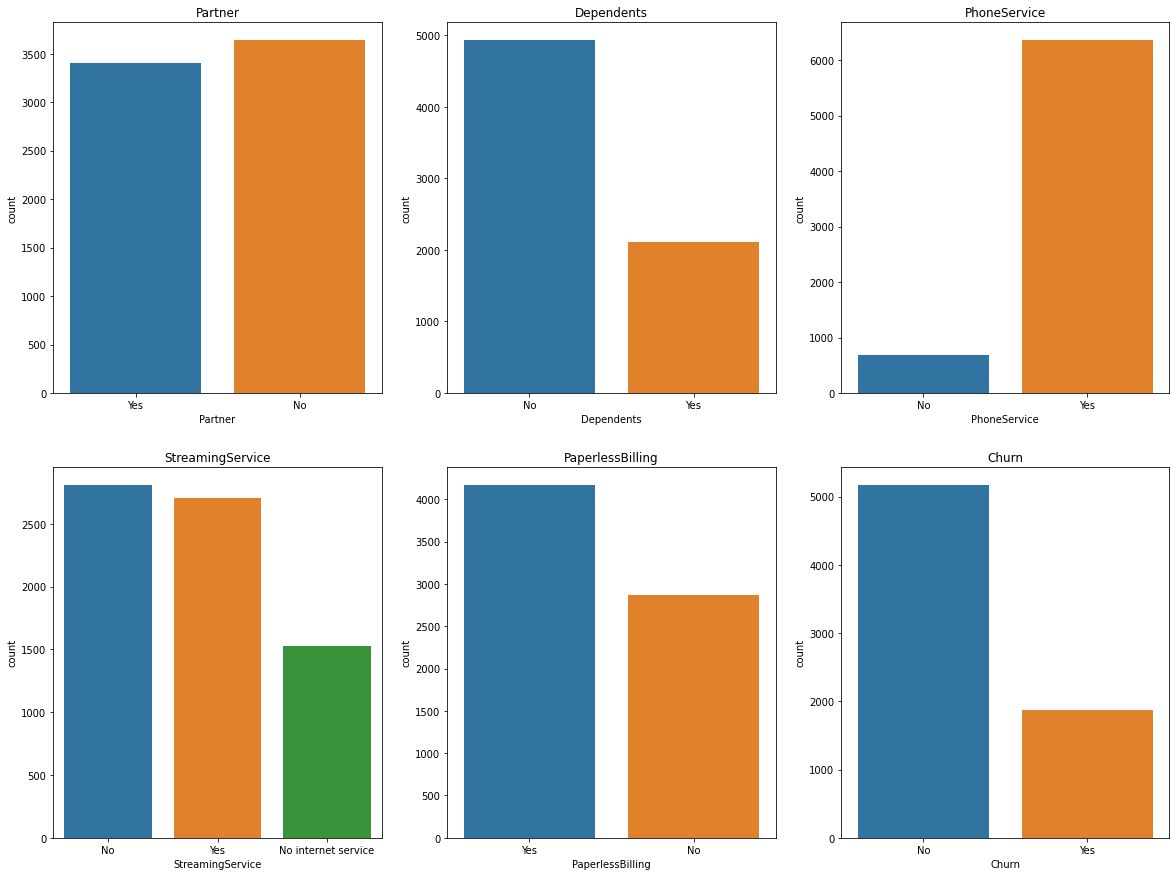

In [10]:
#plotting count values for 'Partner','Dependents','PhoneService', 'StreamingService', 'PaperlessBilling','Churn' columns
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
plt.title("Partner")
sns.countplot(x='Partner', data=df)

plt.subplot(2,3,2)
plt.title("Dependents")
sns.countplot(x='Dependents', data=df)

plt.subplot(2,3,3)
plt.title("PhoneService")
sns.countplot(x='PhoneService', data=df)

plt.subplot(2,3,4)
plt.title("StreamingService")
sns.countplot(x='StreamingService', data=df)

plt.subplot(2,3,5)
plt.title("PaperlessBilling")
sns.countplot(x='PaperlessBilling', data=df)

plt.subplot(2,3,6)
plt.title("Churn")
sns.countplot(x='Churn', data=df)

plt.show()

Streaming service has 3 category, so removing streaming service from data_yes_no_columns list

#### Converting some binary variables (yes/no) to (1/0)

In [11]:
data_yes_no_columns = ['Partner','Dependents','PhoneService', 'PaperlessBilling','Churn']

#convering yes->1 no->0 for 'Partner','Dependents','PhoneService', 'PaperlessBilling','Churn' columns

def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

df[data_yes_no_columns] =df[data_yes_no_columns].apply(binary_map)

In [12]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,StreamingService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,No,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,No,DSL,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,Month-to-month,1,Electronic check,70.70,151.65,1


#### For categorical variables with multiple levels, create dummy features

In [13]:
#creating the dummy variables for some of the categorical variables and dropping the first
dummy1 = pd.get_dummies(df[['Contract','PaymentMethod','gender','InternetService']], drop_first=True)

# Adding the dymmy1 to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,StreamingService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,Female,0,1,0,1,0,No phone service,DSL,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,0,1,0,0,0,0
1,Male,0,0,0,34,1,No,DSL,No,One year,0,Mailed check,56.95,1889.5,0,1,0,0,0,1,1,0,0
2,Male,0,0,0,2,1,No,DSL,No,Month-to-month,1,Mailed check,53.85,108.15,1,0,0,0,0,1,1,0,0
3,Male,0,0,0,45,0,No phone service,DSL,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,1,0,0
4,Female,0,0,0,2,1,No,Fiber optic,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,1,0,0,1,0


In [15]:
#droping original columns 'Contract','PaymentMethod','gender','InternetService'
df.drop(['Contract','PaymentMethod','gender','InternetService'], axis=1, inplace= True)

In [16]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,StreamingService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,0,1,0,1,0,No phone service,No,1,29.85,29.85,0,0,0,0,1,0,0,0,0
1,0,0,0,34,1,No,No,0,56.95,1889.5,0,1,0,0,0,1,1,0,0
2,0,0,0,2,1,No,No,1,53.85,108.15,1,0,0,0,0,1,1,0,0
3,0,0,0,45,0,No phone service,No,0,42.30,1840.75,0,1,0,0,0,0,1,0,0
4,0,0,0,2,1,No,No,1,70.70,151.65,1,0,0,0,1,0,0,1,0


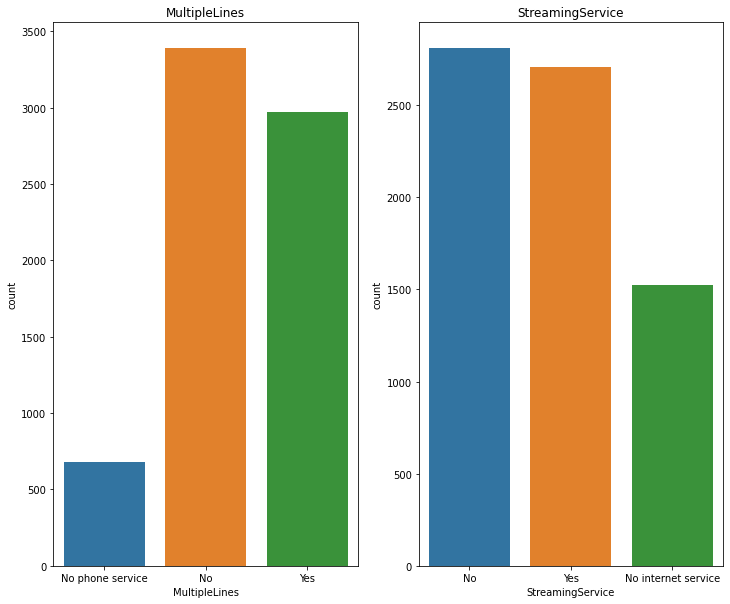

In [17]:
# lets visualize 'MultipleLines', 'StreamingService'
plt.figure(figsize=(12,10))

plt.subplot(1,2,1)
plt.title("MultipleLines")
sns.countplot(x='MultipleLines', data=df)

plt.subplot(1,2,2)
plt.title("StreamingService")
sns.countplot(x='StreamingService', data=df)

plt.show()

In [18]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.
# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines')

In [19]:
ml.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [20]:
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ml1], axis=1)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,StreamingService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes
0,0,1,0,1,0,No phone service,No,1,29.85,29.85,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,34,1,No,No,0,56.95,1889.5,0,1,0,0,0,1,1,0,0,1,0
2,0,0,0,2,1,No,No,1,53.85,108.15,1,0,0,0,0,1,1,0,0,1,0
3,0,0,0,45,0,No phone service,No,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,2,1,No,No,1,70.70,151.65,1,0,0,0,1,0,0,1,0,1,0


In [21]:
# Dropping original 'MultipleLines' column
df.drop(['MultipleLines'], axis=1, inplace= True)

In [22]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,StreamingService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes
0,0,1,0,1,0,No,1,29.85,29.85,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,34,1,No,0,56.95,1889.5,0,1,0,0,0,1,1,0,0,1,0
2,0,0,0,2,1,No,1,53.85,108.15,1,0,0,0,0,1,1,0,0,1,0
3,0,0,0,45,0,No,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,2,1,No,1,70.70,151.65,1,0,0,0,1,0,0,1,0,1,0


In [23]:
# Creating dummy variables for the variable 'StreamingService'
ss = pd.get_dummies(df['StreamingService'], prefix='StreamingService')
ss.head()

,StreamingService_No,StreamingService_No internet service,StreamingService_Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [24]:
# Dropping MultipleLines_No phone service column
ss1 = ss.drop(['StreamingService_No internet service'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ss1], axis=1)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,StreamingService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,StreamingService_No,StreamingService_Yes
0,0,1,0,1,0,No,1,29.85,29.85,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,34,1,No,0,56.95,1889.5,0,1,0,0,0,1,1,0,0,1,0,1,0
2,0,0,0,2,1,No,1,53.85,108.15,1,0,0,0,0,1,1,0,0,1,0,1,0
3,0,0,0,45,0,No,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,2,1,No,1,70.70,151.65,1,0,0,0,1,0,0,1,0,1,0,1,0


In [25]:
# Dropping original 'StreamingService' column
df.drop(['StreamingService'], axis=1, inplace= True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,StreamingService_No,StreamingService_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.5,0,1,0,0,0,1,1,0,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,1,1,0,0,1,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,2,1,1,70.70,151.65,1,0,0,0,1,0,0,1,0,1,0,1,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   object 
 8   Churn                                  7043 non-null   int64  
 9   Contract_One year                      7043 non-null   uint8  
 10  Contract_Two year                      7043 non-null   uint8  
 11  Paym

In [27]:
# The TotalCharges as numric data, imported as string
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7032 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   Contract_One year                      7043 non-null   uint8  
 10  Contract_Two year                      7043 non-null   uint8  
 11  Paym

### checking for outliners

In [29]:
num_columns = df[['TotalCharges','MonthlyCharges','SeniorCitizen', 'tenure']]

#checking outliners at 25%, 50%, 75%, 90%, 95%, 99%
num_columns.describe(percentiles =[.25, .5,.75, .9,.95, .99])

,TotalCharges,MonthlyCharges,SeniorCitizen,tenure
count,7032.000000,7043.000000,7043.000000,7043.000000
mean,2283.300441,64.761692,0.162147,32.371149
std,2266.771362,30.090047,0.368612,24.559481
min,18.800000,18.250000,0.000000,0.000000
25%,401.450000,35.500000,0.000000,9.000000
50%,1397.475000,70.350000,0.000000,29.000000
75%,3794.737500,89.850000,0.000000,55.000000
90%,5976.640000,102.600000,1.000000,69.000000
95%,6923.590000,107.400000,1.000000,72.000000
99%,8039.883000,114.729000,1.000000,72.000000


From the above distribution show, you can see that there no outliners in this data. The numbers are gradually increased.

### checking for null/missing values 

In [30]:
df.isnull().sum()

SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
StreamingService_No                       0
StreamingService_Yes                      0
dtype: int64

In [31]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)),2)

SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
StreamingService_No                      0.00
StreamingService_Yes                     0.00
dtype: float64

In [32]:
#removing null of TotalCharges rows
df = df[~np.isnan(df['TotalCharges'])]

In [33]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/df.shape[1]),2)

SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
StreamingService_No                      0.0
StreamingService_Yes                     0.0
dtype: float64

## Split Test-Train data

In [34]:
x = df.drop(['Churn'], axis=1)
y = df['Churn']

x_train, x_test, y_train,y_test = train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=100)

In [35]:
x.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,StreamingService_No,StreamingService_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,1,0,0,0,1,1,0,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,0,0,0,0,1,1,0,0,1,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,2,1,1,70.70,151.65,0,0,0,1,0,0,1,0,1,0,1,0


### Scaling numerical freatures

In [36]:
scaller = StandardScaler()
x_train[['tenure','MonthlyCharges','TotalCharges']] = scaller.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])
x_train.head()

<ipython-input-36-d6f1c8e9eddd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[['tenure','MonthlyCharges','TotalCharges']] = scaller.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,StreamingService_No,StreamingService_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,1,0,0,0,1,1,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,0,1,0,0,0,0,0,0,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,0,1,0,0,1,0,1,0,1,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,0,0,0,1,0,1,1,0,1,0,0,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,0,0,0,0,1,0,1,0,0,1


In [37]:
#checking the churn rate
churn = (sum(df['Churn'])/len(df['Churn'].index))*100
churn

26.578498293515356

we have almost 27% churn rate

### looking for correlations

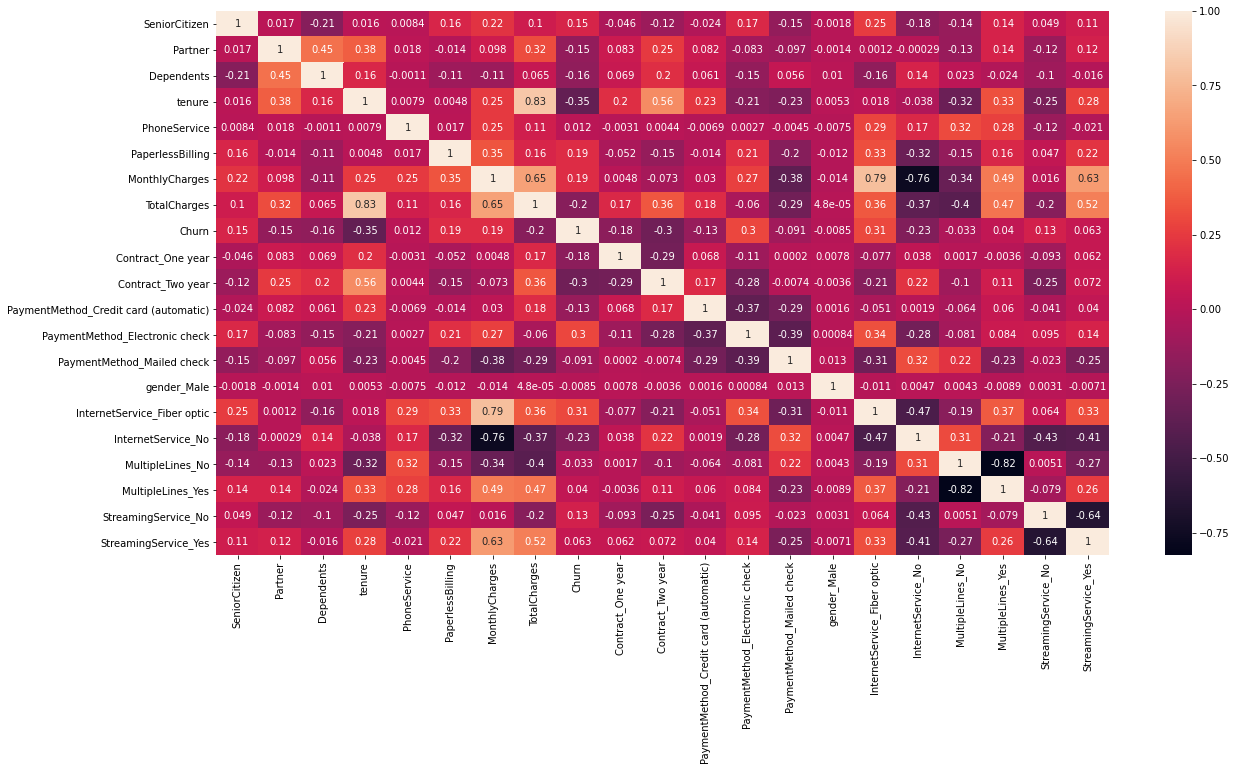

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Model Building
Let's start by splitting our data into a training set and a test set.

In [41]:
# Logistic regression model
logm1 = sm.GLS(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial()).fit()
print(logm1.summary())

                            GLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.286
Model:                            GLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     109.0
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:52:03   Log-Likelihood:                -2108.3
No. Observations:                4922   AIC:                             4255.
Df Residuals:                    4903   BIC:                             4378.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

P-value alway should be <=0.05

#### Feature selection using RFE

In [42]:
logreg = LogisticRegression()
rfe = RFE(logreg, 12)
rfe = rfe.fit(x_train, y_train)

C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [43]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False, False,
       False,  True])

In [44]:
rfe.ranking_

array([1, 8, 5, 1, 7, 1, 1, 1, 1, 1, 1, 4, 1, 9, 1, 1, 2, 6, 3, 1])

In [45]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 8),
 ('Dependents', False, 5),
 ('tenure', True, 1),
 ('PhoneService', False, 7),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 9),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_No', False, 2),
 ('MultipleLines_Yes', False, 6),
 ('StreamingService_No', False, 3),
 ('StreamingService_Yes', True, 1)]

In [46]:
col = x_train.columns[rfe.support_]

In [47]:
col

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'StreamingService_Yes'],
      dtype='object')

### Accessing the model with statsmodels:

In [48]:
x_train_sm = sm.add_constant(x_train[col])
logreg2 = sm.GLS(y_train, x_train_sm, family=sm.families.Binomial())
res =logreg2.fit()
print(res.summary())

                            GLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.281
Model:                            GLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     160.1
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:52:37   Log-Likelihood:                -2124.3
No. Observations:                4922   AIC:                             4275.
Df Residuals:                    4909   BIC:                             4359.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

All the freature of p-values are <= 0.05, so lets move to model predictions

### checking VIF

In [49]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,MonthlyCharges,13.20
4,TotalCharges,10.36
1,tenure,7.25
9,InternetService_Fiber optic,5.43
10,InternetService_No,4.76
6,Contract_Two year,2.66
11,StreamingService_Yes,2.61
2,PaperlessBilling,2.46
5,Contract_One year,1.66
8,PaymentMethod_Mailed check,1.65


There are few variables are high VIF, Its best to drop the variabls as they are not helping with predictions and unnecesary making the model complex

In [50]:
col = col.drop('TotalCharges',1)

In [52]:
x_train_sm = sm.add_constant(x_train[col])
logreg3 = sm.GLS(y_train, x_train_sm, family=sm.families.Binomial())
res =logreg3.fit()
print(res.summary())

                            GLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.273
Model:                            GLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     167.7
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:52:56   Log-Likelihood:                -2151.9
No. Observations:                4922   AIC:                             4328.
Df Residuals:                    4910   BIC:                             4406.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [53]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,MonthlyCharges,8.89
8,InternetService_Fiber optic,5.24
9,InternetService_No,4.65
5,Contract_Two year,2.66
10,StreamingService_Yes,2.61
2,PaperlessBilling,2.46
1,tenure,2.33
4,Contract_One year,1.66
7,PaymentMethod_Mailed check,1.61
6,PaymentMethod_Credit card (automatic),1.41


In [54]:
col = col.drop('MonthlyCharges',1)

In [55]:
x_train_sm = sm.add_constant(x_train[col])
logreg3 = sm.GLS(y_train, x_train_sm, family=sm.families.Binomial())
res =logreg3.fit()
print(res.summary())

                            GLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.271
Model:                            GLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     182.1
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:53:09   Log-Likelihood:                -2160.5
No. Observations:                4922   AIC:                             4343.
Df Residuals:                    4911   BIC:                             4415.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [56]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.62
2,PaperlessBilling,2.32
7,InternetService_Fiber optic,2.23
9,StreamingService_Yes,2.09
1,tenure,1.97
8,InternetService_No,1.76
3,Contract_One year,1.64
6,PaymentMethod_Mailed check,1.58
5,PaymentMethod_Credit card (automatic),1.40
0,SeniorCitizen,1.29


All variables have a good value of VIF. so we ned not drop anymore features and we can proceed with making predictions using this model only

# Getting the predicted values with train set


In [57]:
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

879     0.274193
5790    0.275408
6498    0.610679
880     0.600854
2784    0.633975
3874    0.406677
5387    0.385292
6623    0.704419
4465    0.194712
5364    0.457700
dtype: float64

In [58]:
y_train_pred = y_train_pred.values.reshape(-1)

In [59]:
y_train_pred[:10]

array([0.27419324, 0.27540831, 0.61067897, 0.60085371, 0.63397468,
       0.40667711, 0.38529179, 0.70441858, 0.19471182, 0.45769978])

##### creating a data frame with the actual churn flag and the predicted probabilities:-

In [60]:
y_train_pred_final = pd.DataFrame({'churn': y_train.values, 'churn_prob': y_train_pred})
y_train_pred_final.head()

,churn,churn_prob
0,0,0.274193
1,0,0.275408
2,1,0.610679
3,1,0.600854
4,1,0.633975


In [61]:
y_train_pred_final['custID'] = y_train.index
y_train_pred_final.head()

,churn,churn_prob,custID
0,0,0.274193,879
1,0,0.275408,5790
2,1,0.610679,6498
3,1,0.600854,880
4,1,0.633975,2784


In [62]:
# creating new column 'predicted' with 1 if churn_prob >0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.churn_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,custID,predicted
0,0,0.274193,879,0
1,0,0.275408,5790,0
2,1,0.610679,6498,1
3,1,0.600854,880,1
4,1,0.633975,2784,1


In [63]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted)
confusion

array([[3325,  310],
       [ 669,  618]], dtype=int64)

In [64]:
#lets check the accuracy of the model
print("Accuracy of the model: ",metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted))

Accuracy of the model:  0.8010971149939049


In [65]:
# Metrics beyond simply accuracy

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [66]:
#lets check the Sensitivity of the our model
TP/float(TP+FN)

0.4801864801864802

In [67]:
#lets check the Specificity of the our model
TN / float(TN+FP)

0.9147180192572214

In [68]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08528198074277854


In [69]:
# positive predictive value 
print (TP / float(TP+FP))

0.665948275862069


In [70]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8324987481221833


## Plotting ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [71]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [72]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_prob, drop_intermediate = False )

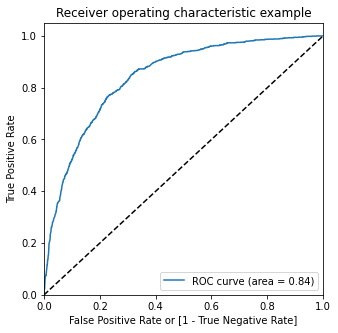

In [73]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_prob)

## Finding optimal cutoff point

Optimal probability is that where we can get balanced sensitivity and specificity.

In [74]:
#lets create columsn with diffrent probability cutoffs
numbers = [float(i)/10 for i in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.churn_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,churn,churn_prob,custID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.274193,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.275408,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.610679,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.600854,880,1,1,1,1,1,1,1,1,0,0,0
4,1,0.633975,2784,1,1,1,1,1,1,1,1,0,0,0


In [75]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [float(i)/10 for i in range(10)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.404510  0.987568  0.198074
0.1   0.1  0.513612  0.968920  0.352407
0.2   0.2  0.637343  0.924631  0.535626
0.3   0.3  0.733442  0.830614  0.699037
0.4   0.4  0.787282  0.664336  0.830812
0.5   0.5  0.801097  0.480186  0.914718
0.6   0.6  0.783218  0.233877  0.977717
0.7   0.7  0.749086  0.048174  0.997249
0.8   0.8  0.738521  0.000000  1.000000
0.9   0.9  0.738521  0.000000  1.000000


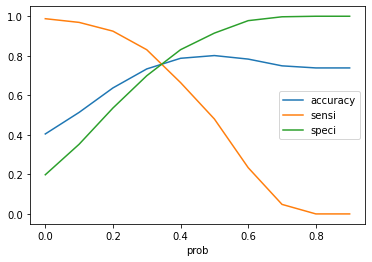

In [76]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [77]:
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,churn,churn_prob,custID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.274193,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.275408,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.610679,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.600854,880,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.633975,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [78]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.7334416903697684

In [79]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[2541, 1094],
       [ 218, 1069]], dtype=int64)

In [80]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

# Let's see the sensitivity of our logistic regression model
print("sensitivity:",TP / float(TP+FN))

# Let us calculate specificity
print("specificity:",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("false postive rate :",FP/ float(TN+FP))

# Positive predictive value 
print("positive rate: ",TP / float(TP+FP))

# Negative predictive value
print ("Negative value :",TN / float(TN+ FN))

sensitivity: 0.8306138306138307
specificity: 0.6990371389270976
false postive rate : 0.3009628610729023
positive rate:  0.49422098936662046
Negative value : 0.920985864443639


## Precision - Recall

In [81]:
y_train_pred_final.head()

,churn,churn_prob,custID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.274193,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.275408,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.610679,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.600854,880,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.633975,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [82]:
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted )
confusion

array([[3325,  310],
       [ 669,  618]], dtype=int64)

##### Precision
TP / TP + FP

In [83]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.665948275862069

##### Recall
TP / TP + FN

In [84]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.4801864801864802

In [85]:
#precision_score
metrics.precision_score(y_train_pred_final.churn, y_train_pred_final.predicted)

0.665948275862069

In [86]:
#recall score
metrics.recall_score(y_train_pred_final.churn, y_train_pred_final.predicted)

0.4801864801864802

### Precision and recall tradeoff

In [87]:
y_train_pred_final[['churn','predicted']].head()

,churn,predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1


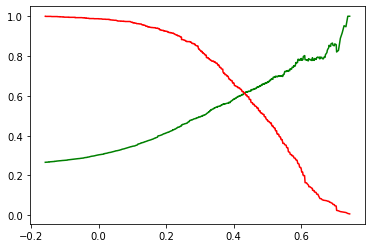

In [88]:
p, r, thresholds = metrics.precision_recall_curve(y_train_pred_final.churn, y_train_pred_final.churn_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [89]:
x_test[['tenure','MonthlyCharges','TotalCharges']] = scaller.fit_transform(x_test[['tenure','MonthlyCharges','TotalCharges']])
x_test = x_test[col]
x_test.head()

<ipython-input-89-159d64068eab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[['tenure','MonthlyCharges','TotalCharges']] = scaller.fit_transform(x_test[['tenure','MonthlyCharges','TotalCharges']])
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,SeniorCitizen,tenure,PaperlessBilling,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,StreamingService_Yes
942,0,-0.332755,1,0,0,1,0,1,0,0
3730,0,1.006613,1,0,0,1,0,1,0,1
1761,0,1.047200,1,0,1,1,0,0,1,0
2283,0,-1.266254,1,0,0,0,1,1,0,0
1872,0,0.357223,0,0,1,0,0,0,1,0


In [90]:
x_test_sm = sm.add_constant(x_test)
y_test_pred = res.predict(x_test_sm)
y_test_pred[:10]

942     0.422568
3730    0.281267
1761   -0.080906
2283    0.525222
1872    0.022567
1970    0.614884
2532    0.391599
1616   -0.077065
2485    0.536600
5914    0.267388
dtype: float64

In [91]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
942,0.422568
3730,0.281267
1761,-0.080906
2283,0.525222
1872,0.022567


In [92]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [93]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [94]:
y_test_df.head()

,Churn,CustID
942,0,942
3730,1,3730
1761,0,1761
2283,1,2283
1872,0,1872


In [95]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.422568
1,1,3730,0.281267
2,0,1761,-0.080906
3,1,2283,0.525222
4,0,1872,0.022567


In [96]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [97]:
# Rearranging the columns
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,942,0.422568
1,1,3730,0.281267
2,0,1761,-0.080906
3,1,2283,0.525222
4,0,1872,0.022567


In [98]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','Churn','Churn_Prob']]

In [99]:
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.422568
1,3730,1,0.281267
2,1761,0,-0.080906
3,2283,1,0.525222
4,1872,0,0.022567


In [100]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,942,0,0.422568,1
1,3730,1,0.281267,0
2,1761,0,-0.080906,0
3,2283,1,0.525222,1
4,1872,0,0.022567,0


In [101]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7739336492890996

In [102]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1276,  252],
       [ 225,  357]], dtype=int64)

In [103]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

print("sensitivity :", TP / float(TP+FN))

print("specificity:", TN / float(TN+FP))

sensitivity : 0.6134020618556701
specificity: 0.8350785340314136


Below are list of freatures to predict correct Churn

- 0 - SeniorCitizen
- 1 - tenure
- 2 - PaperlessBilling
- 3 - Contract_One year
- 4 - Contract_Two year
- 5 - PaymentMethod_Credit card (automatic)
- 6 - PaymentMethod_Mailed check
- 7 - InternetService_Fiber optic
- 8 - InternetService_No
- 9 - StreamingService_Yes

Accuracy of model with cut off values 0.5 is =0.801 \
Accuracy of model with cut off values 0.3 is =0.768 \
Accuracy of model with cut off values 0.42 is =0.778 